# Multi-variate analysis

In this notebook, we will apply principal component analysis and compare different types of  cluster analysis


## Installation of libraries and necessary software

Copy the files  _mmc5_vclust_in.csv_ , _MetaboIonsNormed.csv_ and _FcmClustPEst.R_ into the folder that contains this jupyter notebook or upload them to http://localhost:8888/tree

Install the necessary libraries (only needed once) by executing (shift-enter) the following cell:


In [2]:
install.packages("DAAG", repos='http://cran.us.r-project.org')
install.packages("MASS", repos='http://cran.us.r-project.org')
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", repos='http://cran.us.r-project.org')
BiocManager::install("Biobase")
BiocManager::install("widgetTools")
BiocManager::install("tkWidgets")
BiocManager::install("Mfuzz")
install.packages("e1071", repos='http://cran.us.r-project.org')
install.packages("matrixStats", repos='http://cran.us.r-project.org')


The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//Rtmp5MfoJr/downloaded_packages

The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//Rtmp5MfoJr/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'Biobase'”
'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'widgetTools'”
'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed wh


The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//Rtmp5MfoJr/downloaded_packages

The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//Rtmp5MfoJr/downloaded_packages


## Loading data and libraries
This requires that the installation above has been finished without error

In [5]:
library(DAAG)
library(MASS)
library(Biobase)
library(e1071)
library(matrixStats)

# load data file (you need to place the file into the same folder)
ExampleData <- read.csv("ExampleFile.csv")
MetabolomicsData <- read.csv("MetaboIonsNormed.csv")
source("FcmClustPEst.R")


### Exercise 1
We will use dimensionality reduction to simplify a given data set. For a more extensive description of PCA in R, see e.g. https://www.datacamp.com/community/tutorials/pca-analysis-r

Carry out principal component analysis for the ```possum``` data. Rows with missing values need to be removed before. Plot the scores of the PCA with different colors for the locations where the possums were trapped  (defined by ```site```). 


In [6]:
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)


Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C3,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
C5,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
C10,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
C15,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
C23,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
C24,6,1,Vic,f,1,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
C26,7,1,Vic,m,2,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
C27,8,1,Vic,f,6,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
C28,9,1,Vic,f,9,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0


,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C3,1,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
C5,1,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
C10,1,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
C15,1,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
C23,1,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
C24,1,1,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
C26,1,2,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
C27,1,6,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
C28,1,9,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0279 1.3983 0.98872 0.89684 0.85378 0.73644 0.55664
Proportion of Variance 0.4112 0.1955 0.09776 0.08043 0.07289 0.05423 0.03099
Cumulative Proportion  0.4112 0.6068 0.70452 0.78496 0.85785 0.91208 0.94307
                           PC8     PC9   PC10
Standard deviation     0.51654 0.40308 0.3742
Proportion of Variance 0.02668 0.01625 0.0140
Cumulative Proportion  0.96975 0.98600 1.0000

List of 5
 $ sdev    : num [1:10] 2.028 1.398 0.989 0.897 0.854 ...
 $ rotation: num [1:10, 1:10] -0.235 -0.422 -0.376 -0.403 -0.188 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "age" "hdlngth" "skullw" "totlngth" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:10] 3.82 92.73 56.96 87.27 37.05 ...
  ..- attr(*, "names")= chr [1:10] "age" "hdlngth" "skullw" "totlngth" ...
 $ scale   : Named num [1:10] 1.92 3.52 3.1 4.2 1.97 ...
  ..- attr(*, "names")= chr [1:10] "age" "hdlngth" "skullw" "totlngth" ...
 $ x       : num [1:101, 1:10] -2.422 -1.539 -3.185 -1.913 0.048 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:101] "C3" "C5" "C10" "C15" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


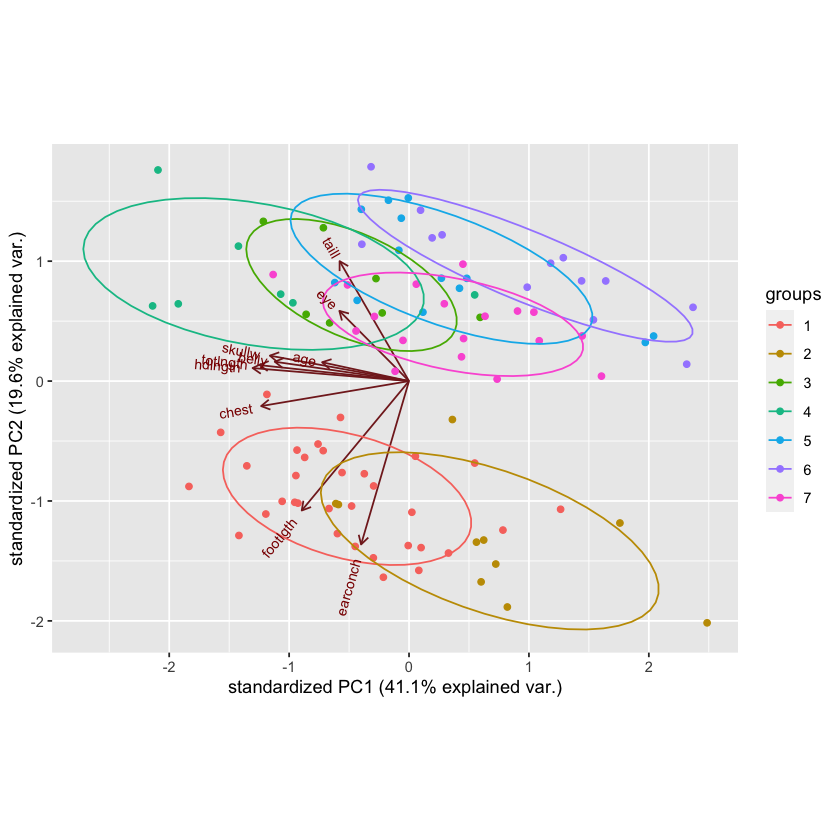

In [8]:
data(possum)
View(possum)
A <- possum[,c(2,5:ncol(possum))]
dat <- data.frame(A)

## How many rows without missing values
removeRowsAllNa  <- function(x){x[apply(x, 1, function(y) all(!is.na(y))),]}
## data.frame without missing values
dat <- removeRowsAllNa(dat)
dat1 <- dat[,2:11]
dat
## PCA 
dat.pca <- prcomp(dat1, center = TRUE,scale. = TRUE)
summary(dat.pca)
str(dat.pca)
library(ggbiplot)
ggbiplot(dat.pca,ellipse=TRUE,groups=factor(dat[,1]))


#### Question I:  <u>How many percent of the variance are already described by principal component 1?</u>

_41.1%_

##### Question II:  <u>Which are the most discriminating traits?</u>

_earconch, footlgth._

##### Question III:  <u>Which sites (provide numbers) can be separated in the scoring plot of the PCA?</u>

_1,2,3_



### Exercise 2

We will now compare different types of cluster analyses, applied to a proteomics data set (phosphorylated peptides) and a transcriptomics data set.

Carry out hierarchical clustering, k-means and fuzzy c-means on the table from the file "mmc5_vclust_in.csv" and the ```geneData``` data in R (use a cluster number of 10 for all)



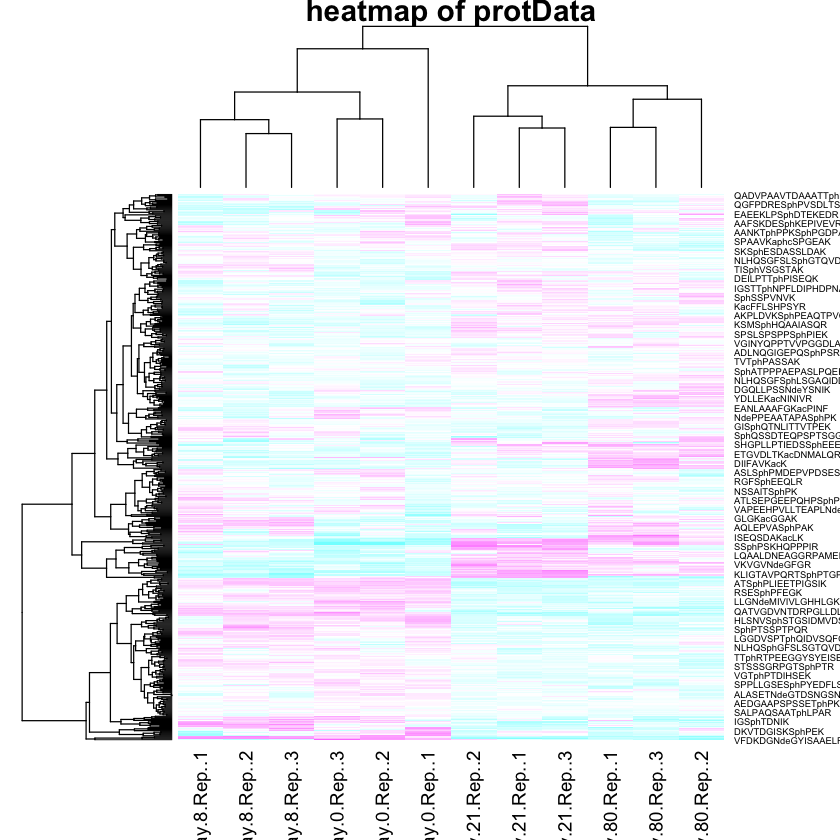

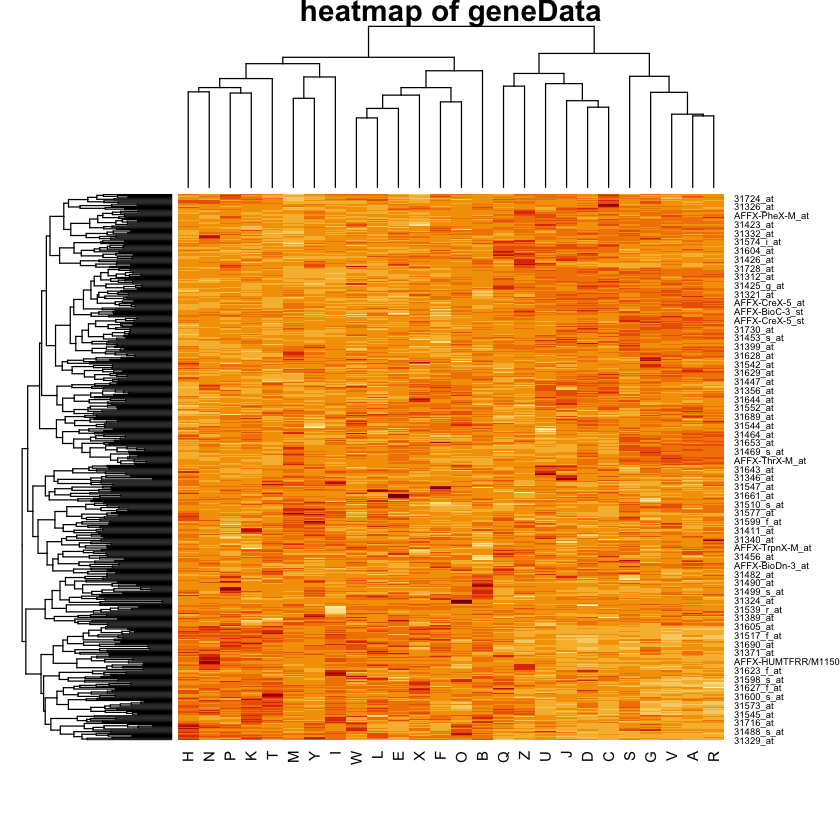

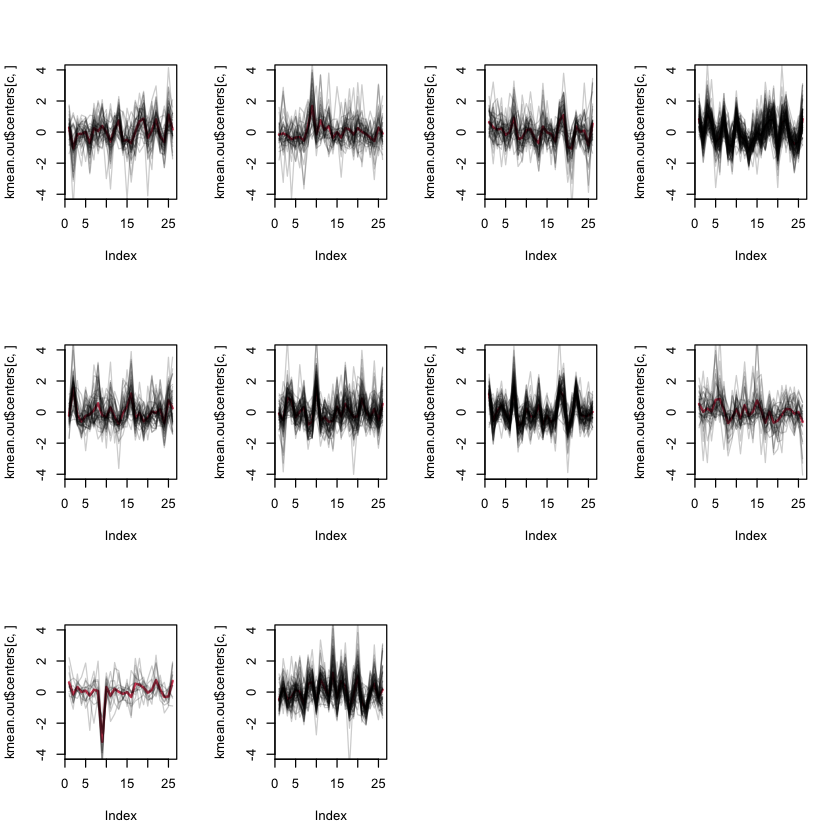

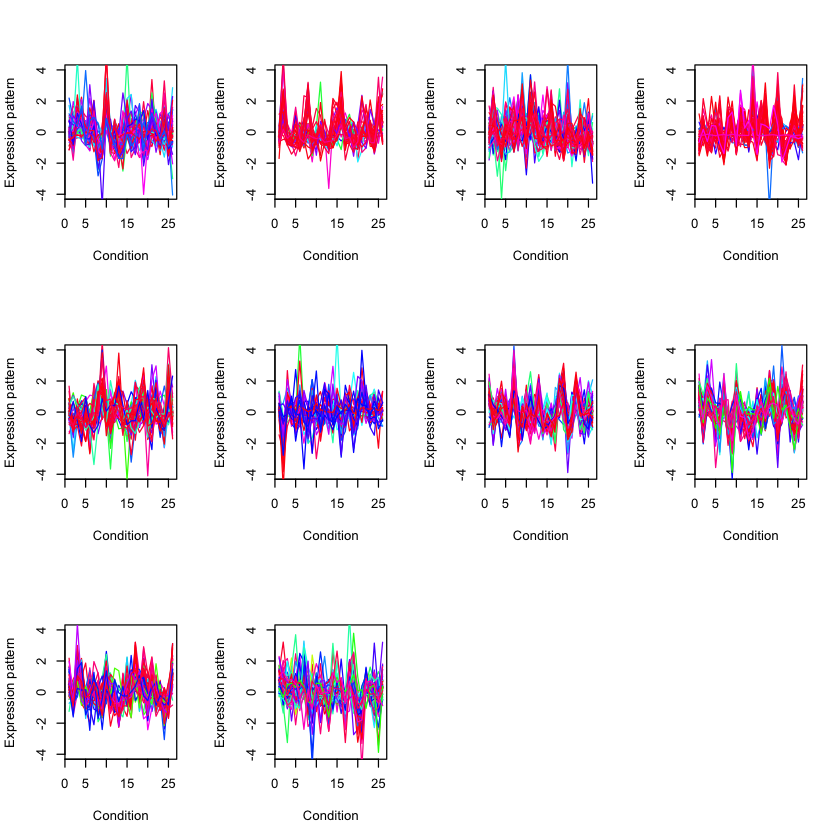

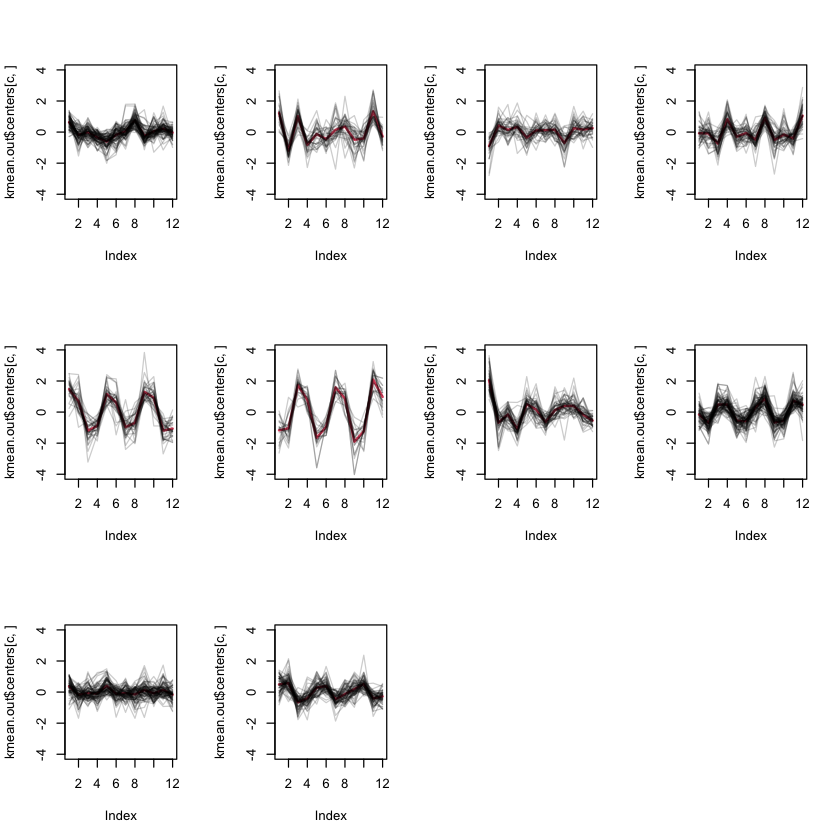

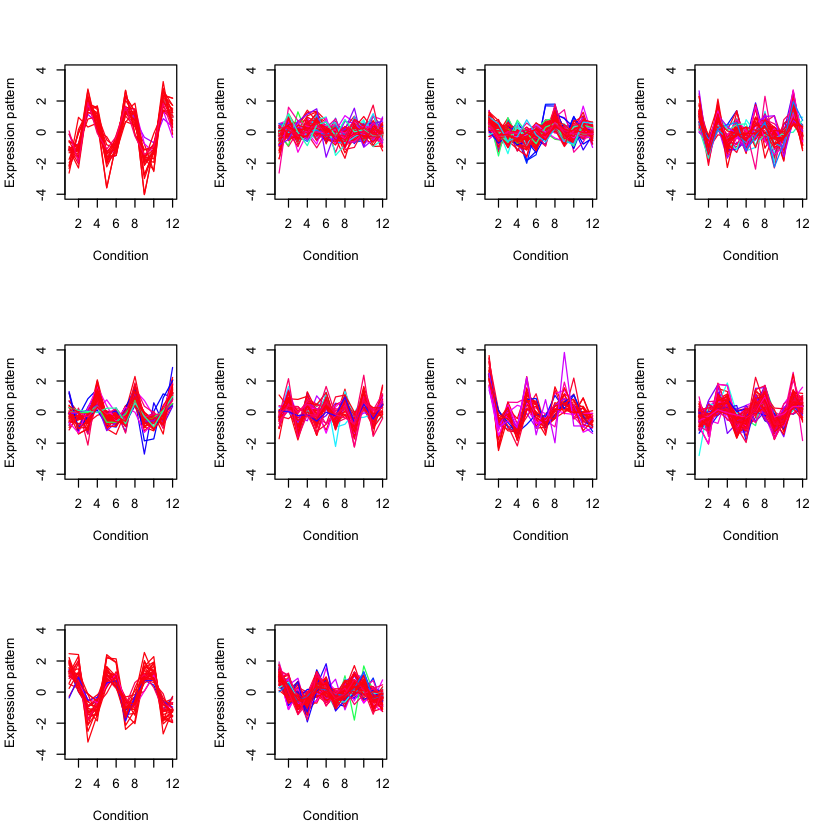

In [53]:
data("geneData") #500*26
protData <- as.matrix(read.csv("mmc5_vclust_in.csv", row.names=1))  #533*12

scaled_geneData <- t(scale(t(geneData))) # this scales each row to have mean 0 and s.d. 1

# heatmap here:
heatmap(protData, col = cm.colors(256), scale = "column",main = "heatmap of protData")
heatmap(scaled_geneData, scale = "column",main = "heatmap of geneData")

## example code for the geneData set
# For the visualization copy the code from the script of the lecture

nclust <- 10
kmean.out <- kmeans(scaled_geneData,nclust)
cm.out <- cmeans(scaled_geneData, nclust, m=1.1)
par(mfrow=c(3,4))
for (c in 1:nclust) {
  # plot centroid
  plot(kmean.out$centers[c,], type="l", lwd=2, col=2, ylim=c(-4,4))
  clustc <- scaled_geneData[kmean.out$cluster==c,]
  # plot genes
  apply(clustc, 1, lines, , col="#00000033")
}
par(mfrow=c(1,1))


## fuzzy c-means clustering
#cm.out$cluster
par(mfrow=c(3,4))
for (c in 1:nclust) {
  plot(cm.out$centers[c,], type="l", lwd=2, col=2, ylim=c(-4,4), xlab="Condition", ylab="Expression pattern")
  # get members of cluster c
  c_indices <- cm.out$cluster==c
  if (sum(c_indices)>1) {
   #  print(sum(c_indices))
   clustc <- scaled_geneData[c_indices,]
   # get membership values, multiply by 100 and round -> number between 0..100
   clustmem <- round(cm.out$membership[c_indices,c]*100)
   # color for each of 100 levels
   colors <- rainbow(100)
   for (m in 1:nrow(clustc)) {
     lines(clustc[m,], col=colors[clustmem[m]])
   }
  }
}
par(mfrow=c(1,1))

## k-means clustering of protData
kmean.out <- kmeans(protData,nclust)
cm.out <- cmeans(protData, nclust, m=1.1)
par(mfrow=c(3,4))
for (c in 1:nclust) {
  # plot centroid
  plot(kmean.out$centers[c,], type="l", lwd=2, col=2, ylim=c(-4,4))
  clustc <- protData[kmean.out$cluster==c,]
  # plot genes
  apply(clustc, 1, lines, , col="#00000033")
}
par(mfrow=c(1,1))

## fuzzy c-means clustering of protData
par(mfrow=c(3,4))
for (c in 1:nclust) {
  plot(cm.out$centers[c,], type="l", lwd=2, col=2, ylim=c(-4,4), xlab="Condition", ylab="Expression pattern")
  # get members of cluster c
  c_indices <- cm.out$cluster==c
  if (sum(c_indices)>1) {
   #  print(sum(c_indices))
   clustc <- protData[c_indices,]
   # get membership values, multiply by 100 and round -> number between 0..100
   clustmem <- round(cm.out$membership[c_indices,c]*100)
   # color for each of 100 levels
   colors <- rainbow(100)
   for (m in 1:nrow(clustc)) {
     lines(clustc[m,], col=colors[clustmem[m]])
   }
  }
}
par(mfrow=c(1,1))

##### Question I:  <u>Read the help describing ```geneData```. What does this dataset contain?</u>

_The geneData data.frame has 500 rows and 26 columns. It consists of a subset of real expression data from an Affymetrix U95v2 chip. The data are anonymous. The covariate data geneCov and geneCovariate are made up. The standard error data seD is also made up._


In [79]:
View(geneData)

,A,B,C,D,E,F,G,H,I,J,⋯,Q,R,S,T,U,V,W,X,Y,Z
AFFX-MurIL2_at,192.7420,85.75330,176.7570,135.57500,64.49390,76.35690,160.5050,65.96310,56.90390,135.608000,⋯,179.84500,152.46700,180.83400,85.41460,157.98900,146.8000,93.8829,103.85500,64.4340,175.61500
AFFX-MurIL10_at,97.1370,126.19600,77.9216,93.37130,24.39860,85.50880,98.9086,81.69320,97.80150,90.483800,⋯,87.68060,108.03200,134.26300,91.40310,-8.68811,85.0212,79.2998,71.65520,64.2369,78.70680
AFFX-MurIL4_at,45.8192,8.83135,33.0632,28.70720,5.94492,28.29250,30.9694,14.79230,14.23990,34.487400,⋯,32.79110,33.52920,19.81720,20.41900,26.87200,31.1488,22.3420,19.01350,12.1686,17.37800
AFFX-MurFAS_at,22.5445,3.60093,14.6883,12.33970,36.86630,11.25680,23.0034,16.21340,12.03750,4.549780,⋯,15.94880,14.67530,-7.91911,12.88750,11.91860,12.8324,11.1390,7.55564,19.9849,8.96849
AFFX-BioB-5_at,96.7875,30.43800,46.1271,70.93190,56.17440,42.67560,86.5156,30.79270,19.71830,46.352000,⋯,58.62390,114.06200,93.44020,22.51680,48.64620,90.2215,42.0053,57.57380,44.8216,61.70440
AFFX-BioB-M_at,89.0730,25.84610,57.2033,69.97660,49.58220,26.12620,75.0083,42.33520,41.12070,91.530700,⋯,58.13310,104.12200,115.83100,58.12240,73.42210,64.6066,40.3068,41.82090,46.1087,49.41220
AFFX-BioB-3_at,265.9640,181.08000,164.9260,161.46900,236.97600,156.80300,211.2570,235.99400,175.64000,229.671000,⋯,192.22100,305.56700,300.68900,146.08100,142.91300,187.1320,170.5830,133.27900,187.4070,144.78400
AFFX-BioC-5_at,110.1360,57.28890,67.3980,77.22070,41.34880,37.97800,110.5510,47.76900,24.78750,66.730200,⋯,53.27110,107.23700,119.66600,24.06540,98.84250,92.0846,53.3866,52.01640,65.9154,75.00430
AFFX-BioC-3_at,43.0794,16.80060,37.6002,46.52720,22.24750,61.64010,33.6623,31.44230,23.10080,39.741900,⋯,57.50780,41.13370,79.98290,23.49530,51.56090,48.1247,31.8358,29.92640,37.8611,60.47720
AFFX-BioDn-5_at,10.9187,16.17890,10.1495,9.73639,16.90280,5.33328,25.1182,38.75760,31.40410,0.398779,⋯,21.50910,3.10536,5.95347,5.66012,52.93380,15.7267,15.2116,-5.35282,13.1884,10.03850


##### Question II:  <u>Why should fuzzy c-means be superior to k-means?</u>

_Each element in K-means can only belong to one category, while an element in Fuzzy C-Means belongs to each category with different probability.  
So, the main difference is that, in Fuzzy-C Means clustering, each point has a weighting associated with a particular cluster, so a point doesn't sit "in a cluster" as much as has a weak or strong association to the cluster, which is determined by the inverse distance to the center of the cluster._

##### Question III:  <u>How many parameters are required for fuzzy c-means? How are they called?</u>

_**cmeans(x, centers, iter.max = 100, verbose = FALSE, dist = "euclidean", method = "cmeans",   
m = 2, rate.par = NULL, weights = 1, control = list())**_

_**x**: The data matrix where columns correspond to variables and rows to observations.  
**centers**: Number of clusters or initial values for cluster centers.  
**m**: A number greater than 1 giving the degree of fuzzification._

##### Question IV:  <u>Which difference do you see between all 3 clustering methods?</u>

_Hierarchical Clustering is hierarchical clustering. It has two types:_

_Bottom-up: that is, each sample point is initially regarded as a category, and then the two most similar samples are aggregated, and this step is iterated until there is only one category.  
Top-down: that is, all samples are initially regarded as a category, and then split according to certain rules until each sample has a single category; this method is rarely used in real-world applications._


_Each element in K-means can only belong to one category, while an element in Fuzzy C-Means belongs to each category with different probability._

##### Question V:  <u>What is a membership value?</u>

![请添加图片描述](https://img-blog.csdnimg.cn/df51e3070d3a463da7085753ec7be841.png?x-oss-process=image/watermark,type_d3F5LXplbmhlaQ,shadow_50,text_Q1NETiBAT3JhbmdlLXl5,size_20,color_FFFFFF,t_70,g_se,x_16)
![请添加图片描述](https://img-blog.csdnimg.cn/5a30c710950e41789a5a89f6cc6d71ef.png)

##### Question VI:  <u>Do you see any specific pattern in the proteomics data? What is the reason to see this behavior?</u>

_They may contain replicates, so the figure will show the same trend of them. We should exclude the replicates to use the method._

### Exercise 3


Extract the columns corresponding to the first replicate of _protData_. Normalize the data to the median and again apply the cluster analysis (all from last exercise) on the resulting four-dimensional data set. 




In [4]:
ExampleData[,19:22]

X114,X115,X116,X117
<dbl>,<dbl>,<dbl>,<dbl>
80200,198000,221000,36700
24100,60700,53800,8310
80200,198000,221000,36700
140000,672000,745000,562000
181000,873000,917000,602000
807000,4340000,4750000,3460000
45000,22500,36400,29300
3910,17800,32700,13200
NA,3220,1990,2120


,Sequence,Protein.Accessions,X..Proteins,X..Protein.Groups,Activation.Type,Modifications,IonScore,Exp.Value,Δ.Score,Rank,⋯,m.z..Da.,MH...Da.,ΔM..ppm.,RT..min.,First.Scan,Last.Scan,MS.Order,Ions.Matched,Spectrum.File,Annotation
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>
1,aAAHHYGAQcDk,IPI00557327.1,2,1,CID,"N-Term(iTRAQ4plex), C10(Methylthio), K12(iTRAQ4plex)",37,0.00899,1.00,1,⋯,535.9198,1605.745,-3.50,42.64,3476,3476,MS2,12/01/94,Obb05178.RAW,NA
2,aAAHHYGAQcDk,IPI00557327.1,2,1,CID,"N-Term(iTRAQ4plex), C10(Methylthio), K12(iTRAQ4plex)",57,0.00010,1.00,1,⋯,803.3785,1605.750,-0.41,42.77,3494,3494,MS2,10/01/94,Obb05178.RAW,NA
3,aAAHHYGAQcDk,IPI00557327.1,2,1,HCD,"N-Term(iTRAQ4plex), C10(Methylthio), K12(iTRAQ4plex)",32,0.02709,1.00,1,⋯,535.9198,1605.745,-3.50,42.64,3477,3477,MS2,05/01/94,Obb05178.RAW,NA
4,aAALEQFk,TREMBL:Q5BJZ3,2,1,CID,"N-Term(iTRAQ4plex), K8(iTRAQ4plex)",46,0.00282,0.76,1,⋯,583.3429,1165.679,-2.96,65.18,6061,6061,MS2,07/01/60,Obb05176.RAW,NA
5,aAALEQFk,TREMBL:Q5BJZ3,2,1,CID,"N-Term(iTRAQ4plex), K8(iTRAQ4plex)",52,0.00068,0.75,1,⋯,583.3434,1165.680,-2.02,65.20,6448,6448,MS2,07/01/60,Obb05177.RAW,NA
6,aAALEQFk,TREMBL:Q5BJZ3,2,1,CID,"N-Term(iTRAQ4plex), K8(iTRAQ4plex)",51,0.00090,0.75,1,⋯,583.3433,1165.679,-2.33,65.07,6622,6622,MS2,07/01/60,Obb05178.RAW,NA


[1] "Sequence"           "Protein.Accessions" "X..Proteins"       
 [4] "X..Protein.Groups"  "Activation.Type"    "Modifications"     
 [7] "IonScore"           "Exp.Value"          "Δ.Score"          
[10] "Rank"               "Identity.High"      "Homology.Threshold"
[13] "QuanResultID"       "Quan.Info"          "Quan.Usage"        
[16] "X115.114"           "X116.114"           "X117.114"          
[19] "X114"               "X115"               "X116"              
[22] "X117"               "Charge"             "m.z..Da."          
[25] "MH...Da."           "ΔM..ppm."          "RT..min."          
[28] "First.Scan"         "Last.Scan"          "MS.Order"          
[31] "Ions.Matched"       "Spectrum.File"      "Annotation"

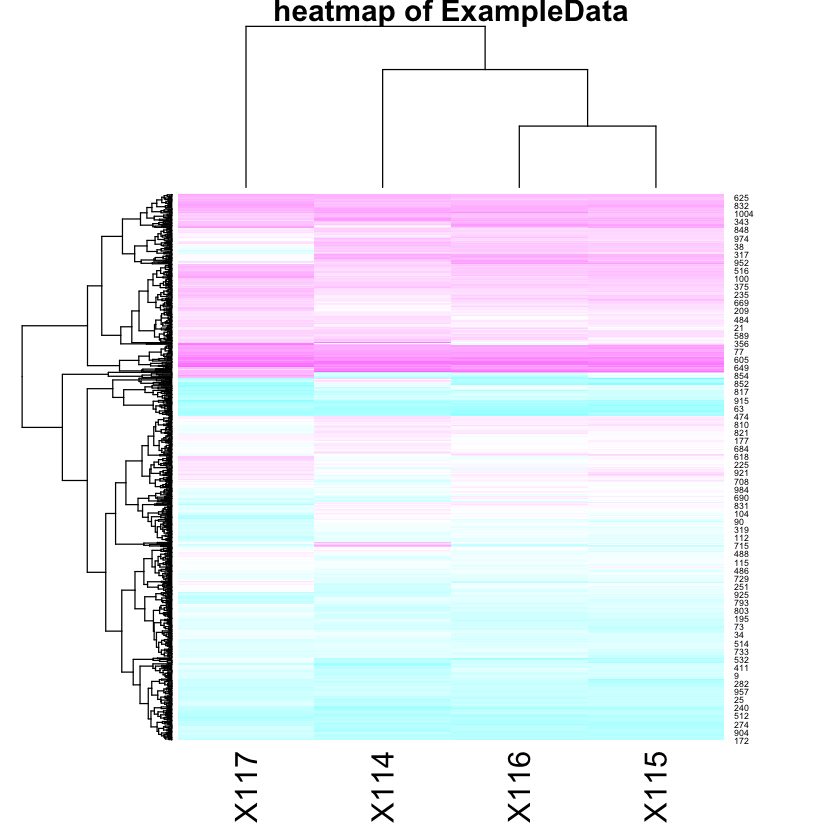

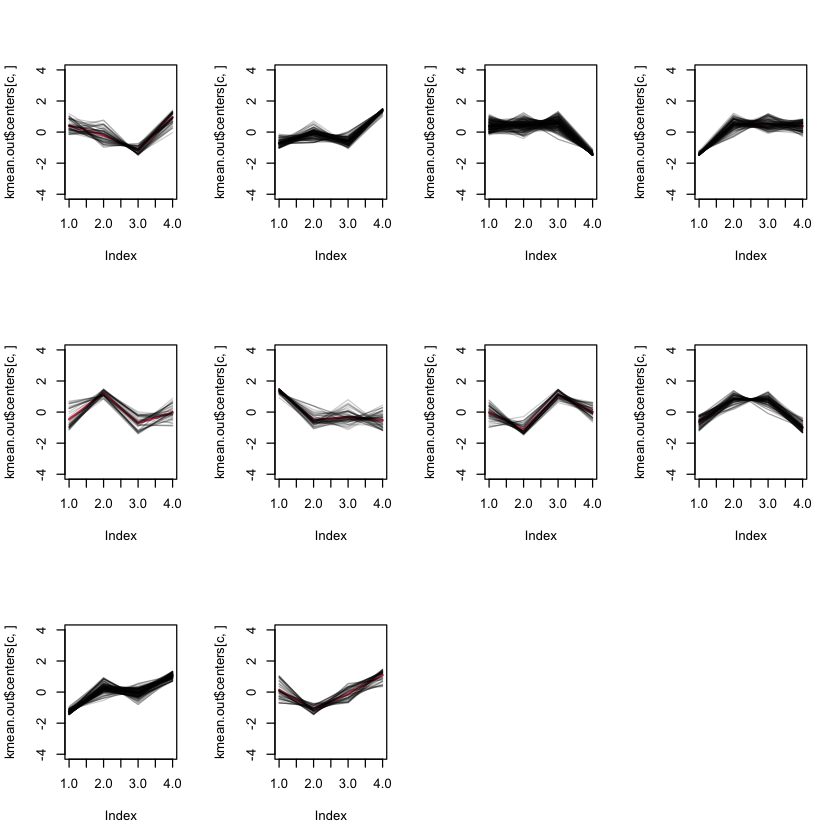

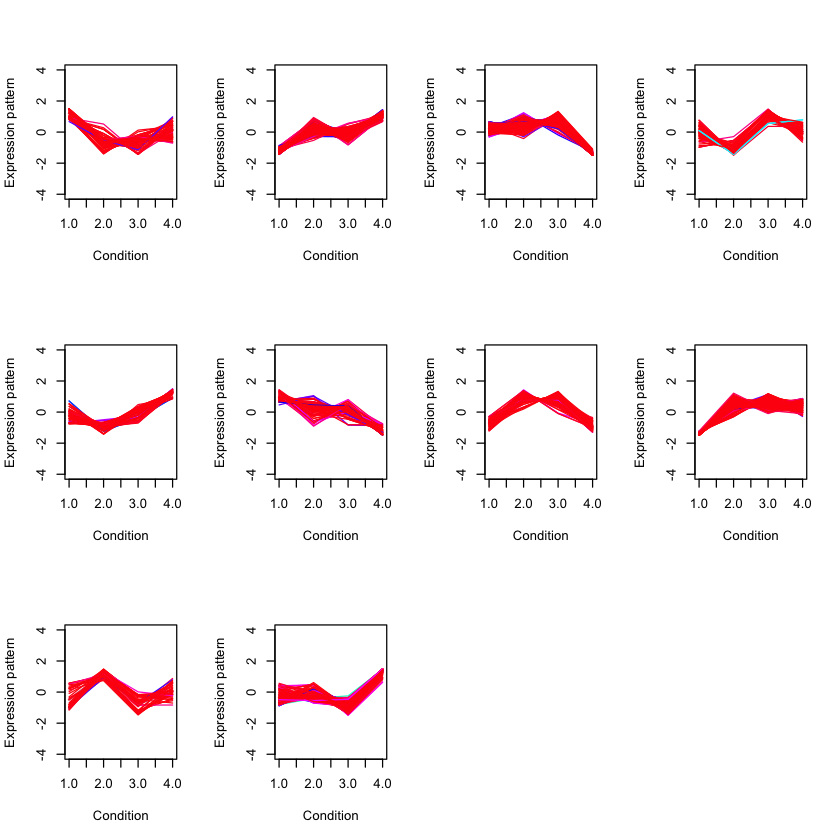

In [54]:
# Show first lines of example file
head(ExampleData)

colnames(ExampleData)
ExampleDataLog <- as.matrix(log2(ExampleData[,19:22]))

# Normalization by median
NormalizedData <- t(t(ExampleDataLog) - colMedians(ExampleDataLog,na.rm=T))

# remove rows with missing values for kmeans and cmeans
NormalizedRedData <- NormalizedData[complete.cases(NormalizedData),]

# heatmap here
heatmap(NormalizedRedData, col = cm.colors(256), scale = "column",main = "heatmap of ExampleData")

# kmeans + cmeans (10 clusters)
StandardizedData <- t(scale(t(NormalizedRedData)))
nclust <- 10

# kmeans
kmean.out <- kmeans(StandardizedData,nclust)
par(mfrow=c(3,4))
for (c in 1:nclust) {
  # plot centroid
  plot(kmean.out$centers[c,], type="l", lwd=2, col=2, ylim=c(-4,4))
  clustc <- StandardizedData[kmean.out$cluster==c,]
  # plot genes
  apply(clustc, 1, lines, , col="#00000033")
}
par(mfrow=c(1,1))


## fuzzy c-means clustering
cm.out <- cmeans(StandardizedData, nclust, m=1.1)
par(mfrow=c(3,4))
for (c in 1:nclust) {
  plot(cm.out$centers[c,], type="l", lwd=2, col=2, ylim=c(-4,4), xlab="Condition", ylab="Expression pattern")
  # get members of cluster c
  c_indices <- cm.out$cluster==c
  if (sum(c_indices)>1) {
   #  print(sum(c_indices))
   clustc <- StandardizedData[c_indices,]
   # get membership values, multiply by 100 and round -> number between 0..100
   clustmem <- round(cm.out$membership[c_indices,c]*100)
   # color for each of 100 levels
   colors <- rainbow(100)
   for (m in 1:nrow(clustc)) {
     lines(clustc[m,], col=colors[clustmem[m]])
   }
  }
}
par(mfrow=c(1,1))



##### Question I:  <u>What does the function colMedians give?</u>

_Calculates the median for each column in a matrix.  
**colMedians(x, rows = NULL, cols = NULL, na.rm = FALSE, dim. = dim(x),..., useNames = NA)**_

##### Question II:  <u>What do the row names of protData stand for?</u>

_proteomics sequence_

##### Question III:  <u>Is this data log-transformed? If yes, what tell us that it is already transformed?</u>

_Yes.  
**ExampleDataLog <- as.matrix(log2(ExampleData[,19:22]))**_

##### Question IV:  <u>How do we check whether the median normalization was correctly executed?</u>

_the median normalization will make the mean of the data equal to 0._

##### Question V:  <u>Which samples are most similar and how does this show?</u>

_X115 and X116._

##### Question VI:  <u>Why do we have to _scale_ the data before using k-means and fuzzy c-means?</u>

_If you have mixed numerical data, where each attribute is something entirely different (say, shoe size and weight), has different units attached (lb, tons, m, kg ...) then these values aren't really comparable anyway; z-standardizing them is a best-practise to give equal weight to them._



### Exercise 4
We will now look into the consequences of using different parameters of fuzzy c-means clustering. The fuzzifier will be automatically set to an optimal value which is much higher than previously used $m=1.1$.

Carry out fuzzy c-means using the parameter estimation from the lecture on ```StandardizedData```. Compare the results to the ones in the exercise above.

[1] "Estimated m= 2.61341841614135"
[1] "fcm-clustering for 2 clusters"
[1] "fcm-clustering for 3 clusters"
[1] "fcm-clustering for 4 clusters"
[1] "fcm-clustering for 5 clusters"
[1] "fcm-clustering for 6 clusters"
[1] "fcm-clustering for 7 clusters"
[1] "fcm-clustering for 8 clusters"
[1] "fcm-clustering for 9 clusters"
[1] "fcm-clustering for 10 clusters"
[1] "fcm-clustering for 11 clusters"
[1] "fcm-clustering for 12 clusters"
[1] "fcm-clustering for 13 clusters"
[1] "fcm-clustering for 14 clusters"
[1] "fcm-clustering for 15 clusters"
[1] "fcm-clustering for 16 clusters"
[1] "fcm-clustering for 17 clusters"
[1] "fcm-clustering for 18 clusters"
[1] "fcm-clustering for 19 clusters"
[1] "fcm-clustering for 20 clusters"
[1] "fcm-clustering for 21 clusters"
[1] "fcm-clustering for 22 clusters"
[1] "fcm-clustering for 23 clusters"
[1] "fcm-clustering for 24 clusters"
[1] "fcm-clustering for 25 clusters"
[1] "best c from mindist:  3"
[1] "best c from xie beni index:  2"


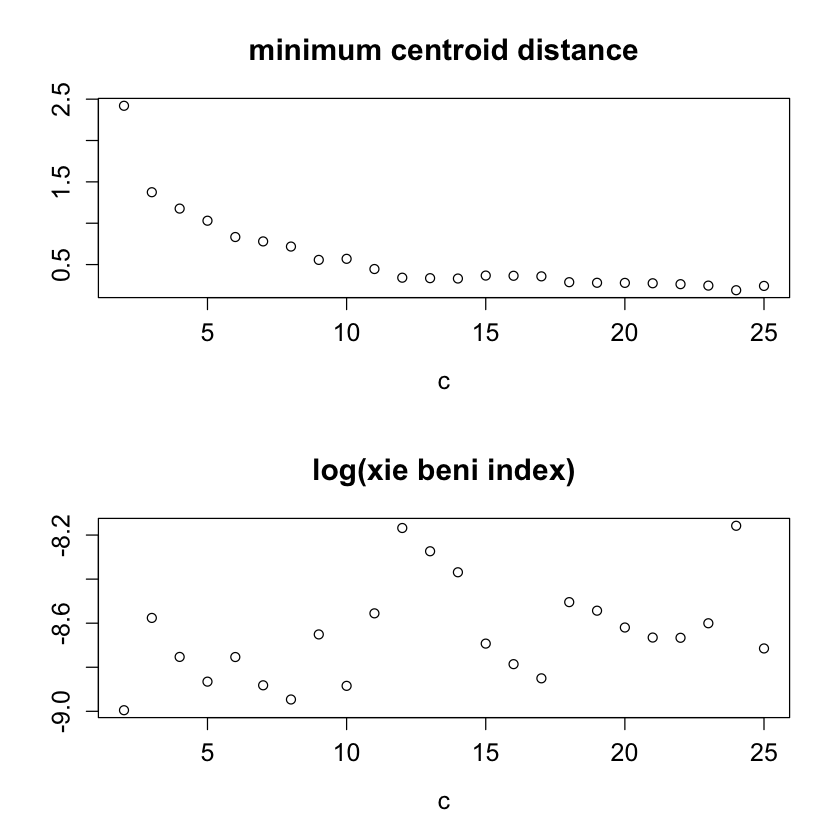

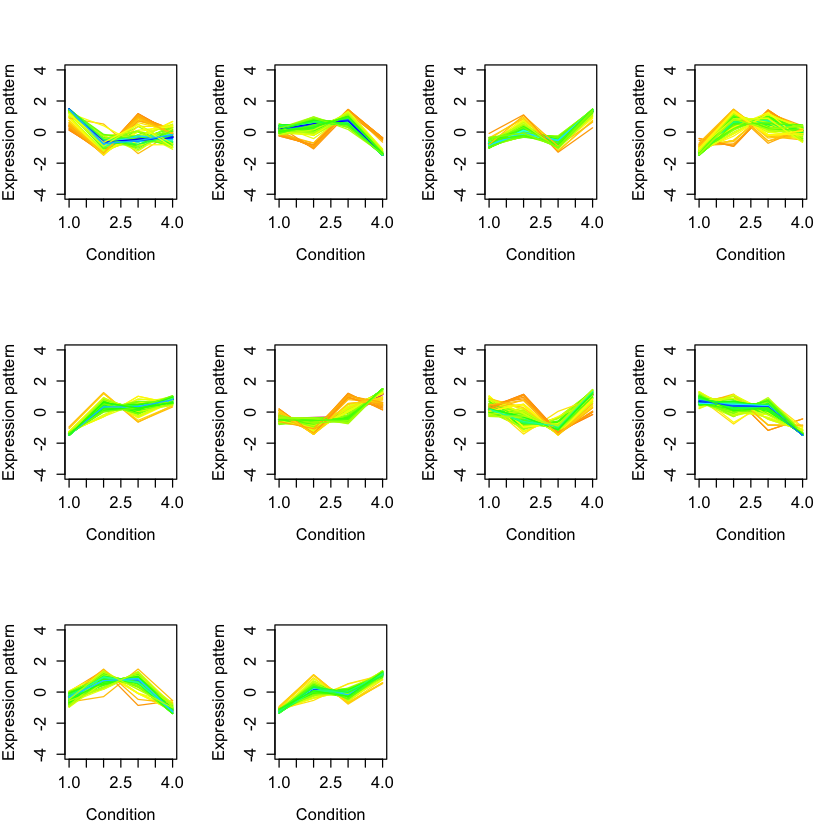

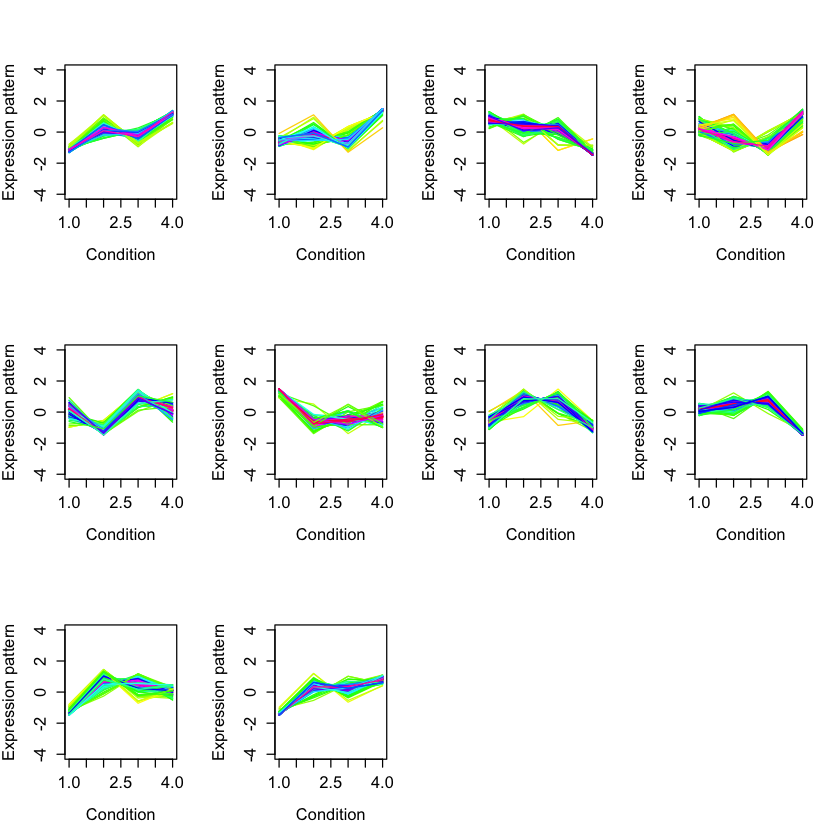

In [70]:
PExpr <- new("ExpressionSet",expr=as.matrix(StandardizedData))
parameters <- FcmClustPEst(PExpr, maxc = 25)

# fuzzy c-means clustering with these here:
cm.out <- cmeans(StandardizedData, nclust, m=3)
par(mfrow=c(3,4))
for (c in 1:nclust) {
  plot(cm.out$centers[c,], type="l", lwd=2, col=2, ylim=c(-4,4), xlab="Condition", ylab="Expression pattern")
  # get members of cluster c
  c_indices <- cm.out$cluster==c
  if (sum(c_indices)>1) {
   #  print(sum(c_indices))
   clustc <- StandardizedData[c_indices,]
   # get membership values, multiply by 100 and round -> number between 0..100
   clustmem <- round(cm.out$membership[c_indices,c]*100)
   # color for each of 100 levels
   colors <- rainbow(100)
   for (m in 1:nrow(clustc)) {
     lines(clustc[m,], col=colors[clustmem[m]])
   }
  }
}
par(mfrow=c(1,1))

cm.out <- cmeans(StandardizedData, nclust, m=2)
par(mfrow=c(3,4))
for (c in 1:nclust) {
  plot(cm.out$centers[c,], type="l", lwd=2, col=2, ylim=c(-4,4), xlab="Condition", ylab="Expression pattern")
  # get members of cluster c
  c_indices <- cm.out$cluster==c
  if (sum(c_indices)>1) {
   #  print(sum(c_indices))
   clustc <- StandardizedData[c_indices,]
   # get membership values, multiply by 100 and round -> number between 0..100
   clustmem <- round(cm.out$membership[c_indices,c]*100)
   # color for each of 100 levels
   colors <- rainbow(100)
   for (m in 1:nrow(clustc)) {
     lines(clustc[m,], col=colors[clustmem[m]])
   }
  }
}
par(mfrow=c(1,1))


In [90]:
mem <- data.frame(cm.out$membership)
removeRows  <- function(x){x[apply(x, 1, function(y) all(y<0.5) ),]}
## data.frame without missing values
mem <- removeRows(mem)
mem

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0.11210914,0.06880509,0.041488476,0.04473063,0.111464671,0.033362192,0.090046428,0.056380225,0.23653410,0.20507905
11,0.01167218,0.01067179,0.294991552,0.01127858,0.016330667,0.021628280,0.107305639,0.490020382,0.02226821,0.01383272
12,0.05482306,0.05850474,0.245037965,0.07267267,0.049975474,0.129792958,0.116436704,0.150568641,0.06781223,0.05437556
15,0.07813014,0.05959258,0.061700893,0.04849874,0.264771248,0.047961846,0.108191649,0.085257616,0.13631276,0.10958254
27,0.14293647,0.18117437,0.034974212,0.16094717,0.176607216,0.060290510,0.039043708,0.035591150,0.06427392,0.10416128
35,0.02381802,0.02092688,0.161805926,0.02134456,0.066529430,0.039481288,0.162625806,0.426328394,0.04730236,0.02983734
41,0.09796003,0.03958832,0.013482987,0.01930891,0.022925318,0.011156418,0.031634161,0.017427471,0.26231456,0.48420183
42,0.09796003,0.03958832,0.013482987,0.01930891,0.022925318,0.011156418,0.031634161,0.017427471,0.26231456,0.48420183
44,0.13144376,0.16574318,0.036617303,0.15931733,0.203176754,0.064587849,0.039956336,0.037073489,0.06336172,0.09872228


##### Question I:  <u>Do the validation indices agree on the number of clusters?</u>


In [94]:
cm.out

Fuzzy c-means clustering with 10 clusters

Cluster centers:
         X114        X115       X116       X117
1  -1.1316575  0.16876053 -0.2264323  1.1893293
2  -0.6472254 -0.09318102 -0.6354634  1.3758698
3   0.7328850  0.36706773  0.2973073 -1.3972601
4   0.2369719 -0.46475852 -0.9331952  1.1609818
5   0.1599186 -1.23686735  0.9731011  0.1038476
6   1.3661927 -0.64034003 -0.4525988 -0.2732539
7  -0.5567520  0.84241948  0.7436154 -1.0292828
8   0.2103077  0.49250268  0.7135065 -1.4163169
9  -1.3317010  0.69765214  0.5309386  0.1031102
10 -1.3947843  0.36233889  0.2133438  0.8191016

Memberships:
                   1            2            3            4            5
   [1,] 0.0043435744 0.0041647574 0.7500525241 0.0047827304 0.0087194163
   [2,] 0.0014607483 0.0014199505 0.9388259349 0.0016552716 0.0025885265
   [3,] 0.0043435744 0.0041647574 0.7500525241 0.0047827304 0.0087194163
   [4,] 0.2640803147 0.0676507729 0.0096845136 0.0236765510 0.0197723060
   [5,] 0.0785676056 0.0235862469

##### Question II:  <u>What are the main differences of the results between running fuzzy c-means clustering in the exercise above and here?</u>

_They use different m values._

##### Question III:  <u>What is the total number of clustered proteins when not considering proteins with max. membership value $>$ 0.5?</u>

_377_

### Exercise 5
We now will look into a metabolomics data set with strong temporal behavior and use a version of fuzzy c-means clustering that includes the variance of the replicates which is usually discarded

Carry out hierarchical clustering on metabolomics data (paper: https://www.ncbi.nlm.nih.gov/pubmed/26373870) and test different distance measures. For that, check the help pages of ```heatmap``` and ```dist```.

Load the file into VSClust (http://computproteomics.bmb.sdu.dk/Apps/VSClust) and carry out the analysis there (the app can become irreponsive while multiple users apply the analysis). Use the PCA plot to see whether you read the file with the correctly set number of replicates and conditions. Estimate the parameter values and then apply the variance-based clustering.

,X,WT.DIL100.A00,WT.DIL100.A01,WT.DIL100.A02,WT.DIL100.A03,WT.DIL100.A04,WT.DIL100.A05,WT.DIL100.A06,WT.DIL100.A07,WT.DIL100.A08,⋯,WT.DIL100.D10,WT.DIL100.D11,WT.DIL100.D12,WT.DIL100.D13,WT.DIL100.D14,WT.DIL100.D15,WT.DIL100.D16,WT.DIL100.D17,WT.DIL100.D18,WT.DIL100.D19
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2-Propyn-1-ol,0.1027715,-0.06005286,-0.03310344,-0.2168476,-0.02345328,-0.06673591,-0.2421761,-0.1539331,-0.1635454,⋯,-0.2603617,-0.1760749,-0.001187334,-0.1143327,-0.1301198,-0.1051781,-0.3233929,-0.1811095,-0.1255770,-0.3917093
2,Acetone,3.0523215,2.92115689,2.99844380,2.9820074,2.99778478,2.90885346,2.9540582,2.9564396,2.9271740,⋯,2.8925733,2.9067826,2.875316615,2.9924317,2.9252905,2.8334599,2.9883266,2.8835048,2.9760273,2.8222474
3,Aminoacetaldehyde,-0.2521812,-0.18937431,-0.24501149,-0.3571961,-0.24708142,-0.11629127,-0.4046469,-0.5241299,-0.2449212,⋯,-0.6163529,-0.4098619,-0.149951123,-0.2704834,-0.4290403,-0.6226434,-0.5700548,-0.7436954,-0.5329567,-0.5812311
4,Acetate,4.0944240,4.03447245,4.05395923,4.0885069,4.10048587,4.13958422,3.9478405,3.9151621,3.9527929,⋯,3.8781450,3.9202124,4.000889859,3.9153585,3.8378473,3.9154091,3.9685485,3.8563305,3.9364276,3.8382519
5,Propan-2-ol,1.5692566,1.72542519,1.68721525,1.5372249,1.65961686,1.41871568,1.7187891,1.6130237,1.6026808,⋯,1.5769786,1.5767840,1.484990777,1.5820193,1.5168434,1.6179007,1.5147282,1.4624041,1.5779072,1.8089429
6,Nitrate,1.0182144,1.05635663,1.16802986,1.2074555,1.06906598,1.18398090,1.0865133,1.0763793,0.9802890,⋯,0.8724700,0.8916009,0.943640259,1.0413015,0.8452587,0.9271882,1.0426811,1.1005648,0.9471885,0.9168426


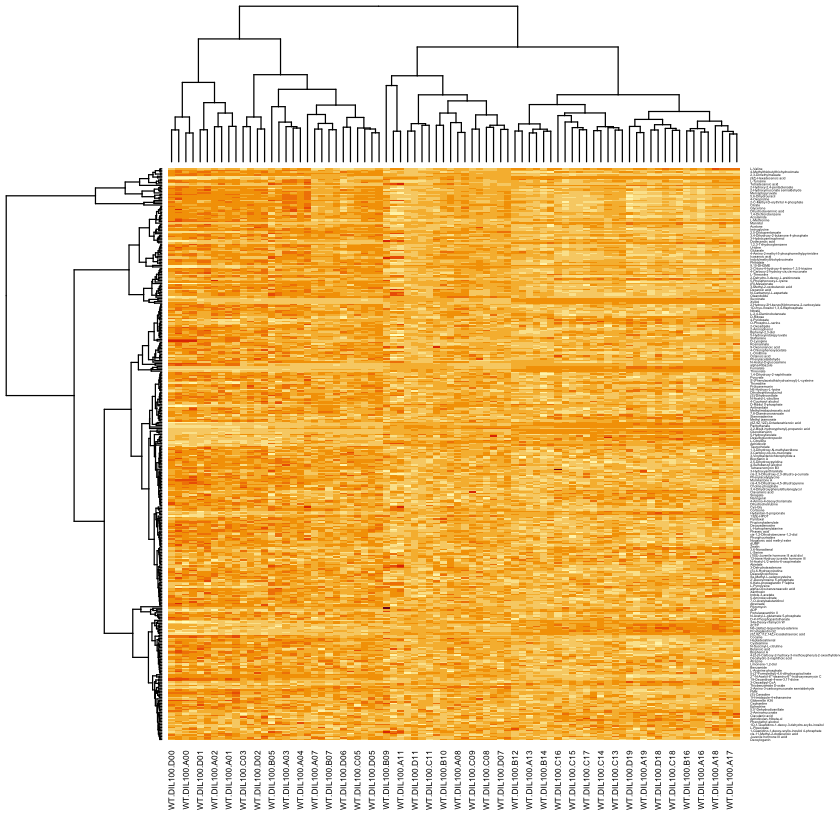

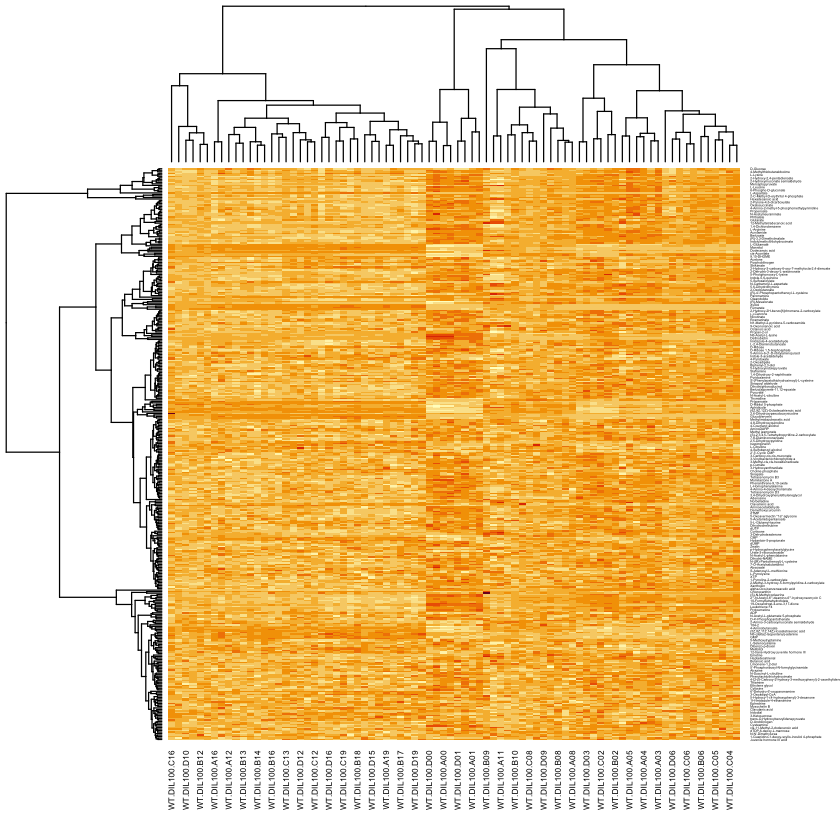

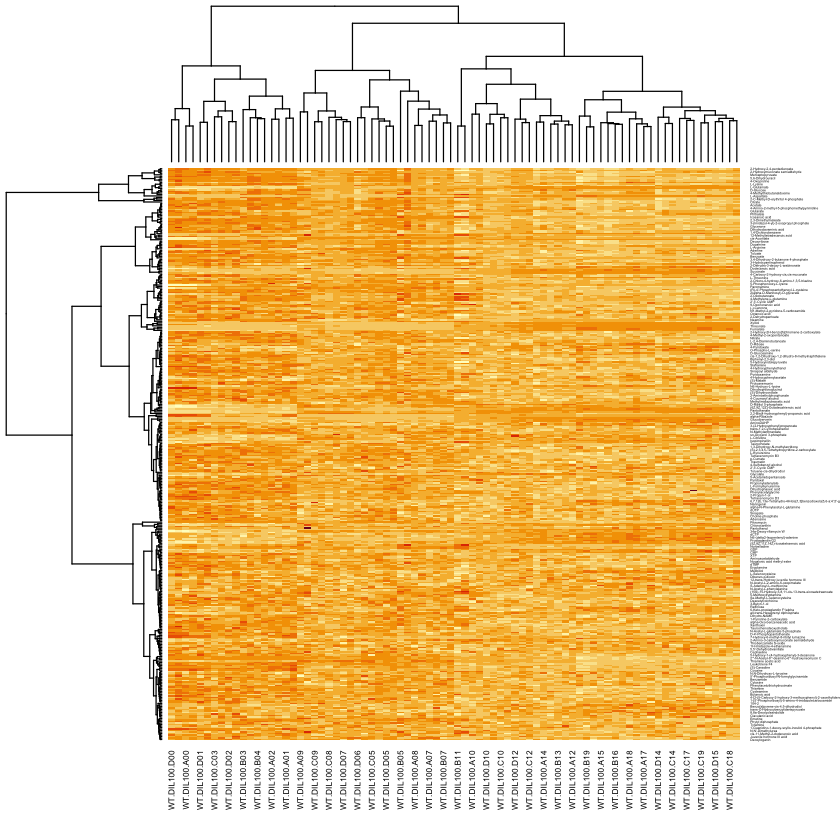

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     4.2086 2.3061 1.37701 0.8957 0.66880 0.60829 0.52833
Proportion of Variance 0.5806 0.1743 0.06215 0.0263 0.01466 0.01213 0.00915
Cumulative Proportion  0.5806 0.7549 0.81701 0.8433 0.85797 0.87010 0.87925
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.48126 0.46759 0.42478 0.39101 0.36374 0.33884 0.32490
Proportion of Variance 0.00759 0.00717 0.00591 0.00501 0.00434 0.00376 0.00346
Cumulative Proportion  0.88684 0.89400 0.89992 0.90493 0.90927 0.91303 0.91649
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     0.30901 0.30685 0.29785 0.28842 0.2814 0.27839 0.26786
Proportion of Variance 0.00313 0.00309 0.00291 0.00273 0.0026 0.00254 0.00235
Cumulative Proportion  0.91962 0.92270 0.92561 0.92834 0.9309 0.93347 0.93583
                         PC22    PC23    P

List of 5
 $ sdev    : num [1:80] 4.209 2.306 1.377 0.896 0.669 ...
 $ rotation: num [1:379, 1:80] -0.0188 -0.0132 -0.0257 -0.0143 -0.0111 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:379] "2-Propyn-1-ol" "Acetone" "Aminoacetaldehyde" "Acetate" ...
  .. ..$ : chr [1:80] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:379] -0.182 2.927 -0.415 3.962 1.558 ...
  ..- attr(*, "names")= chr [1:379] "2-Propyn-1-ol" "Acetone" "Aminoacetaldehyde" "Acetate" ...
 $ scale   : logi FALSE
 $ x       : num [1:80, 1:80] -6.23 -5.82 -5.73 -5.09 -4.57 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:80] "WT.DIL100.A00" "WT.DIL100.A01" "WT.DIL100.A02" "WT.DIL100.A03" ...
  .. ..$ : chr [1:80] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


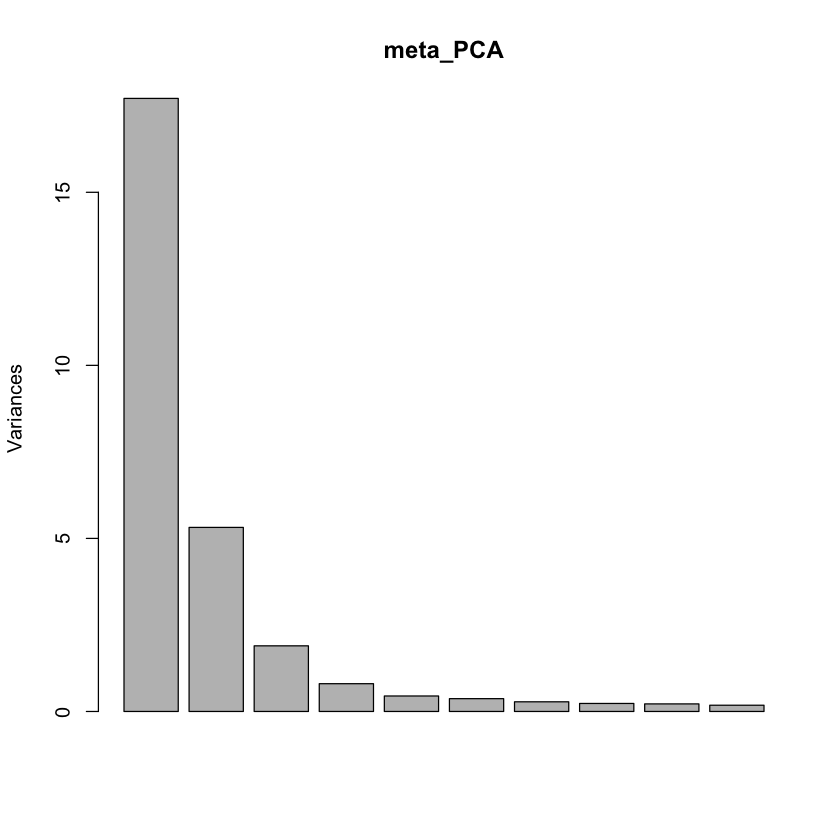

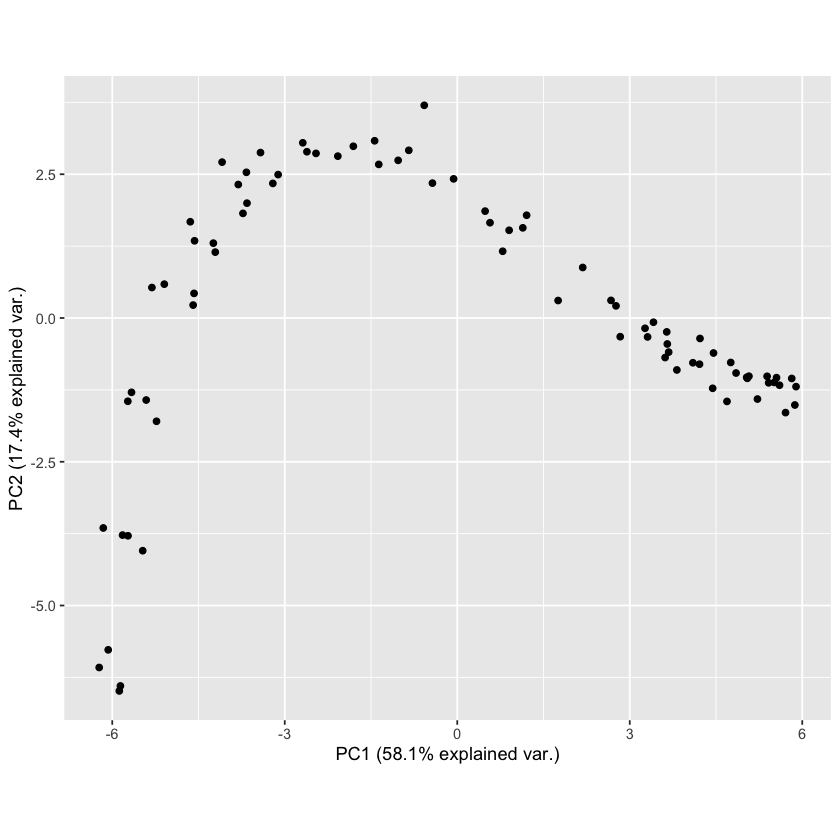

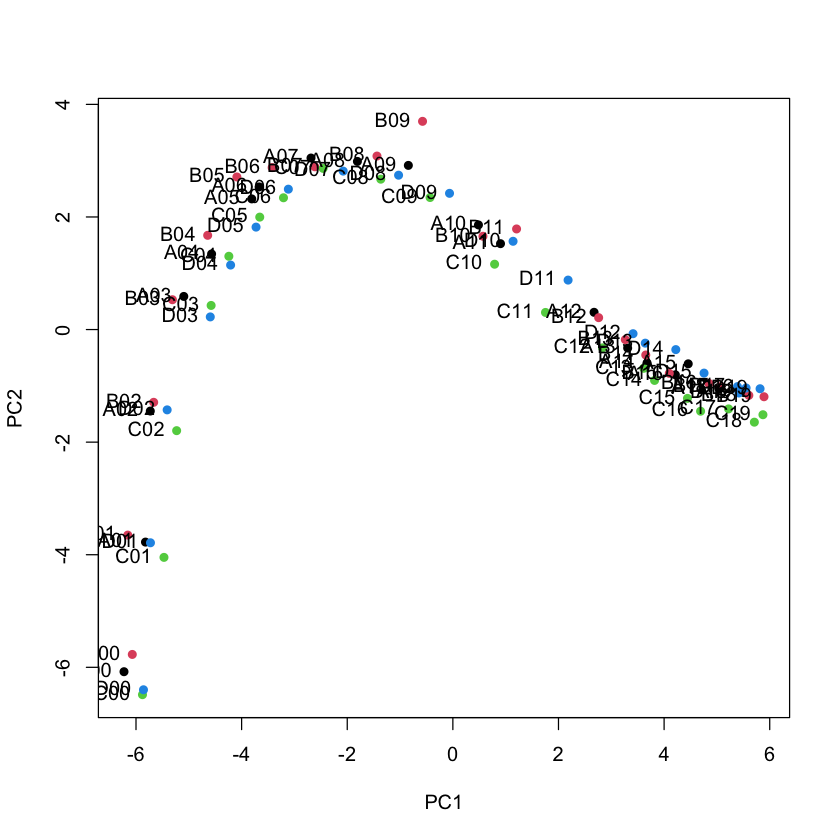

In [97]:
# create the heatmap  here:
head(MetabolomicsData)
rownames(MetabolomicsData) <- MetabolomicsData$X
MetabolomicsDataM <- as.matrix(MetabolomicsData[,2:ncol(MetabolomicsData)])

heatmap(MetabolomicsDataM,cexRow = 0.2, cexCol= 0.5, distfun = function(x) dist(x,method = 'euclidean'))
heatmap(MetabolomicsDataM,cexRow = 0.2, cexCol= 0.5, distfun = function(x) dist(x,method = 'maximum'))
heatmap(MetabolomicsDataM,cexRow = 0.2, cexCol= 0.5, distfun = function(x) dist(x,method = 'manhattan'))

meta_PCA<-prcomp(t(MetabolomicsDataM))
plot(meta_PCA)
summary(meta_PCA)
str(meta_PCA)
library(ggbiplot)
ggbiplot(meta_PCA,ellipse=TRUE,obs.scale = 1, var.scale = 1,var.axes=FALSE)
        
plot(meta_PCA$x,pch=16,col=c(rep(c(1,2,3,4),each=20)))
text(meta_PCA$x,substr(colnames(MetabolomicsDataM),11,13),pos=2)

![请添加图片描述](https://img-blog.csdnimg.cn/d2c8c65bcc4f492fbcf9100ee5ddc390.png?x-oss-process=image/watermark,type_d3F5LXplbmhlaQ,shadow_50,text_Q1NETiBAT3JhbmdlLXl5,size_20,color_FFFFFF,t_70,g_se,x_16)

![请添加图片描述](https://img-blog.csdnimg.cn/79229ea8976147ce8d914cf2ae3d9ad9.png?x-oss-process=image/watermark,type_d3F5LXplbmhlaQ,shadow_50,text_Q1NETiBAT3JhbmdlLXl5,size_20,color_FFFFFF,t_70,g_se,x_16)

![请添加图片描述](https://img-blog.csdnimg.cn/26cc6d525f4940009034a37a4df8b98c.png?x-oss-process=image/watermark,type_d3F5LXplbmhlaQ,shadow_50,text_Q1NETiBAT3JhbmdlLXl5,size_20,color_FFFFFF,t_70,g_se,x_16)

##### Question I:  <u>What are the main differences between heatmap and variance-sensitive clustering?</u>

_heatmap often use euclidean distance to value, while Variance-sensitive clustering additionally considers individual feature variance, which can be visualized by circle size or superposition of normal distributions. _

##### Question II:  <u>Do you recognize the same groups?</u>

_Yes, like the A00,B00,C00,D00, they will gather together._

##### Question III:  <u>Why can the calculation of the heatmap take long?</u>

_They need to caculate between each two samples or features and compare the values. We can use arguments Rowv=NA and Colv=NA to suppress the row and column dendrograms and use some other logic to sort the rows and columns._

##### Question IV:  <u>Do the replicates of all 12 time points cluster together? If not, when do they fail to group and why do think this happens?</u>

_No. There may be some experimental error._

##### Question V:  <u>Does this improve when using another distance measure?</u>

_It is perhaps more useful, but I don't find it in this set results._

